In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats

In [38]:
data_raw = [
    377,
    342,
    337,
    334,
    332,
    324,
    320,
    303,
    302,
    298,
    297,
    297,
    294,
    291,
    287,
    287,
    285,
    281,
    281,
    281,
    278,
    273,
    272,
    269,
    268,
    264
]
data = np.array(data_raw)

print("----- 描述性统计 -----")

# 1. 计数
count = data.size  # 或 len(data)
print(f"数据个数 (Count): {count}")

# 2. 求和
total_sum = np.sum(data)  # 使用 np.sum
print(f"数据总和 (Sum): {total_sum}")

# 3. 均值 (算术平均数)
mean = np.mean(data)    # 使用 np.mean
print(f"均值 (Mean): {mean:.2f}") # 保留两位小数

# 4. 中位数
median = np.median(data)  # 使用 np.median
print(f"中位数 (Median): {median}")

# 5. 众数 (可能不唯一)
# 在计算众数部分修改如下：
mode = mode_result.mode.item()  # 直接获取标量值
mode_count = mode_result.count.item()  # 同步修正计数

if mode_count == 1 and count > 1: 
    print("众数 (Mode): 数据中没有唯一众数 (或众数不明显)")
else:
    print(f"众数 (Mode): {mode} (出现 {mode_count} 次)")

# 6. 标准差 (样本标准差)
stdev = np.std(data, ddof=1) # 使用 np.std, ddof=1 计算样本标准差
print(f"标准差 (Sample StDev): {stdev:.2f}")

# 7. 方差 (样本方差)
variance = np.var(data, ddof=1) # 使用 np.var, ddof=1 计算样本方差
print(f"方差 (Sample Variance): {variance:.2f}")

# 8. 最小值
minimum = np.min(data) # 使用 np.min
print(f"最小值 (Minimum): {minimum}")

# 9. 最大值
maximum = np.max(data) # 使用 np.max
print(f"最大值 (Maximum): {maximum}")

# 10. 极差 (全距)
data_range = maximum - minimum
print(f"极差 (Range): {data_range}")

# 11. 四分位数
q1 = np.percentile(data, 25) # 使用 np.percentile 计算四分位数 (Q1, Q2, Q3)
q3 = np.percentile(data, 75) # 计算 Q3
print(f"下四分位数 (Q1): {q1:.2f}")
print(f"上四分位数 (Q3): {q3:.2f}")

----- 描述性统计 -----
数据个数 (Count): 26
数据总和 (Sum): 7774
均值 (Mean): 299.00
中位数 (Median): 292.5
众数 (Mode): 281 (出现 3 次)
标准差 (Sample StDev): 27.76
方差 (Sample Variance): 770.72
最小值 (Minimum): 264
最大值 (Maximum): 377
极差 (Range): 113
下四分位数 (Q1): 281.00
上四分位数 (Q3): 315.75


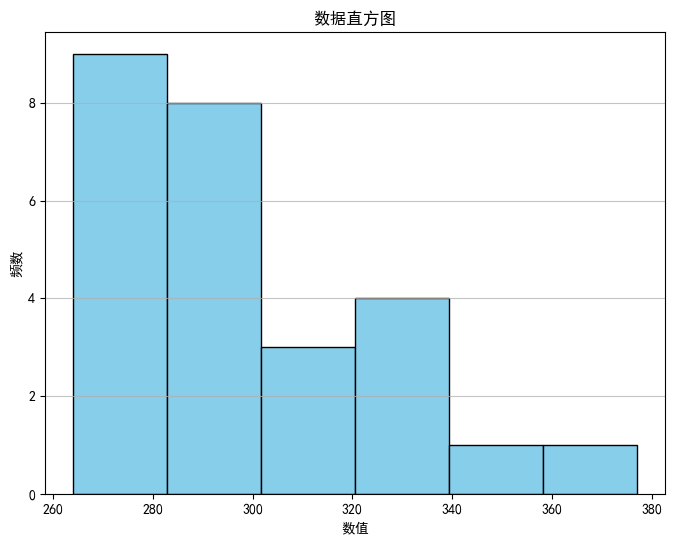

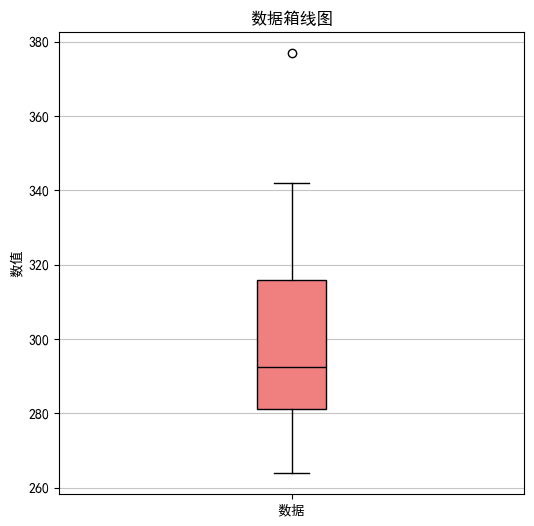

In [39]:

# 1. 直方图 (Histogram)
plt.figure(figsize=(8, 6))  # 创建一个图形，可以设置尺寸
plt.hist(data, bins='auto', color='skyblue', edgecolor='black') # bins='auto' 让matplotlib自动选择合适的bin数量
plt.title('数据直方图')
plt.xlabel('数值')
plt.ylabel('频数')
plt.grid(axis='y', alpha=0.75) # 添加水平网格线，增强可读性
plt.show()  # 显示图形

# 2. 箱线图 (Box Plot)
plt.figure(figsize=(6, 6)) # 创建一个图形，可以设置尺寸
plt.boxplot(data, vert=True, patch_artist=True,  # vert=True 垂直箱线图, patch_artist 填充箱体颜色
            boxprops=dict(facecolor='lightcoral', color='black'), # 箱体属性
            capprops=dict(color='black'),                       # 箱须端帽属性
            whiskerprops=dict(color='black'),                     # 箱须属性
            medianprops=dict(color='black'))                      # 中位数线属性
plt.title('数据箱线图')
plt.ylabel('数值')
plt.xticks([1], ['数据']) # 设置 X 轴刻度标签，这里只有一个箱线图，所以设置为 '数据'
plt.grid(axis='y', alpha=0.75) # 添加水平网格线，增强可读性
plt.show() # 显示图形

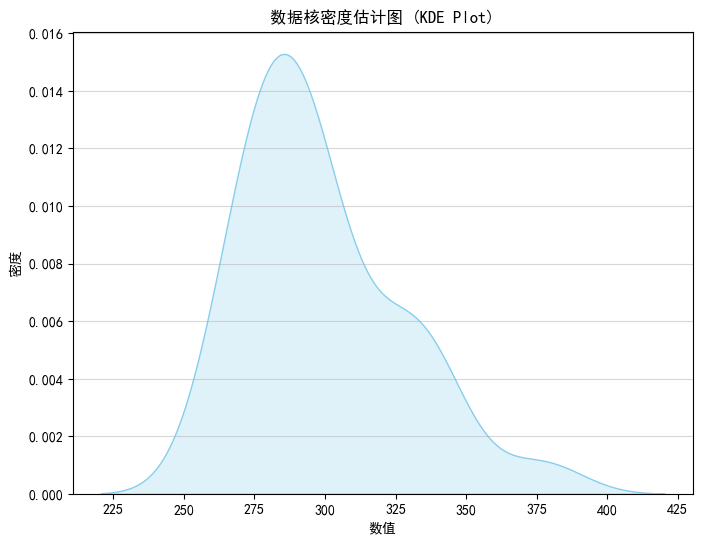

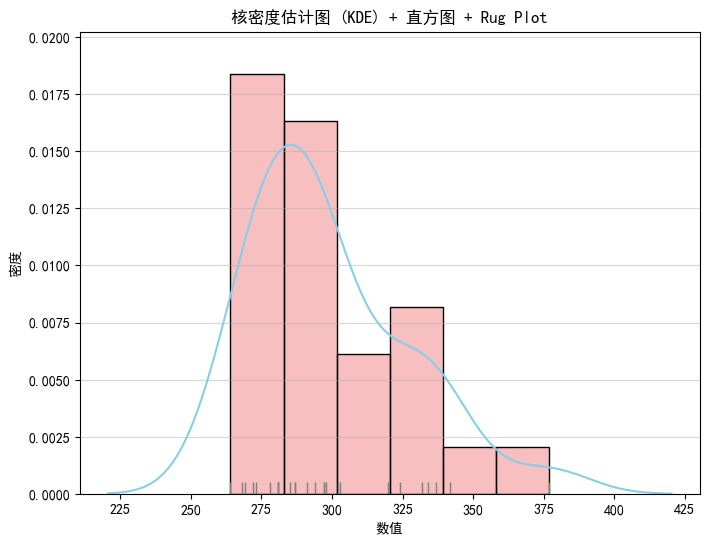

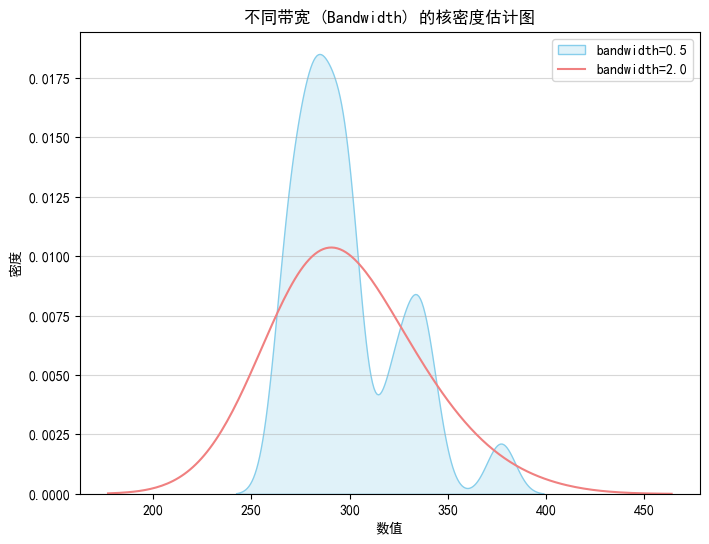

In [40]:
# 1. 基本核密度估计图
plt.figure(figsize=(8, 6)) # 设置图形大小
sns.kdeplot(data, color='skyblue', fill=True) # 绘制 KDE 图，填充颜色
plt.title('数据核密度估计图 (KDE Plot)')
plt.xlabel('数值')
plt.ylabel('密度') # Y轴是密度 (Probability Density)
plt.grid(axis='y', alpha=0.5) # 添加水平网格线
plt.show()

# 2.  结合直方图和 Rug Plot (地毯图)
plt.figure(figsize=(8, 6))
sns.histplot(data, bins='auto', color='lightcoral', kde=False, alpha=0.5, stat='density') # 添加直方图， stat='density' 将y轴归一化为密度
sns.kdeplot(data, color='skyblue', fill=False) # 叠加 KDE 图，不填充

sns.rugplot(data, color='gray') # 添加 Rug Plot，显示每个数据点的实际位置

plt.title('核密度估计图 (KDE) + 直方图 + Rug Plot')
plt.xlabel('数值')
plt.ylabel('密度')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 3.  调整 KDE 曲线的平滑程度 (bandwidth)
plt.figure(figsize=(8, 6))
sns.kdeplot(data, color='skyblue', fill=True, bw_adjust=0.5, label='bandwidth=0.5') # 较小的 bandwidth，曲线更贴近数据，可能更不平滑
sns.kdeplot(data, color='lightcoral', fill=False, bw_adjust=2.0, label='bandwidth=2.0') # 较大的 bandwidth，曲线更平滑
plt.title('不同带宽 (Bandwidth) 的核密度估计图')
plt.xlabel('数值')
plt.ylabel('密度')
plt.legend() # 显示图例
plt.grid(axis='y', alpha=0.5)
plt.show()